In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

<ipython-input-1-830c3a369e7a>:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:
df = pd.read_csv("TATAMOTORS.NS.csv")
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,02-04-2018,335.000000,340.799988,332.700012,339.149994,339.149994,9874486
1,03-04-2018,338.399994,344.500000,337.149994,343.100006,343.100006,6989584
2,04-04-2018,346.799988,363.700012,346.250000,355.600006,355.600006,27157199
3,05-04-2018,362.600006,372.350006,359.799988,362.200012,362.200012,28886070
4,06-04-2018,362.000000,368.350006,356.450012,364.100006,364.100006,13297051


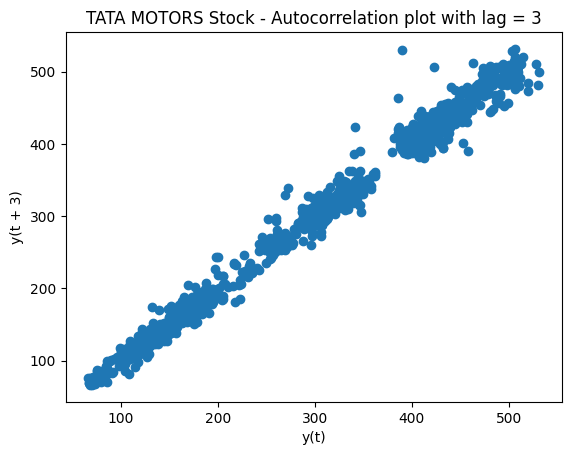

In [25]:
plt.figure()
lag_plot(df['Open'], lag=3)
plt.title('TATA MOTORS Stock - Autocorrelation plot with lag = 3')
plt.show()

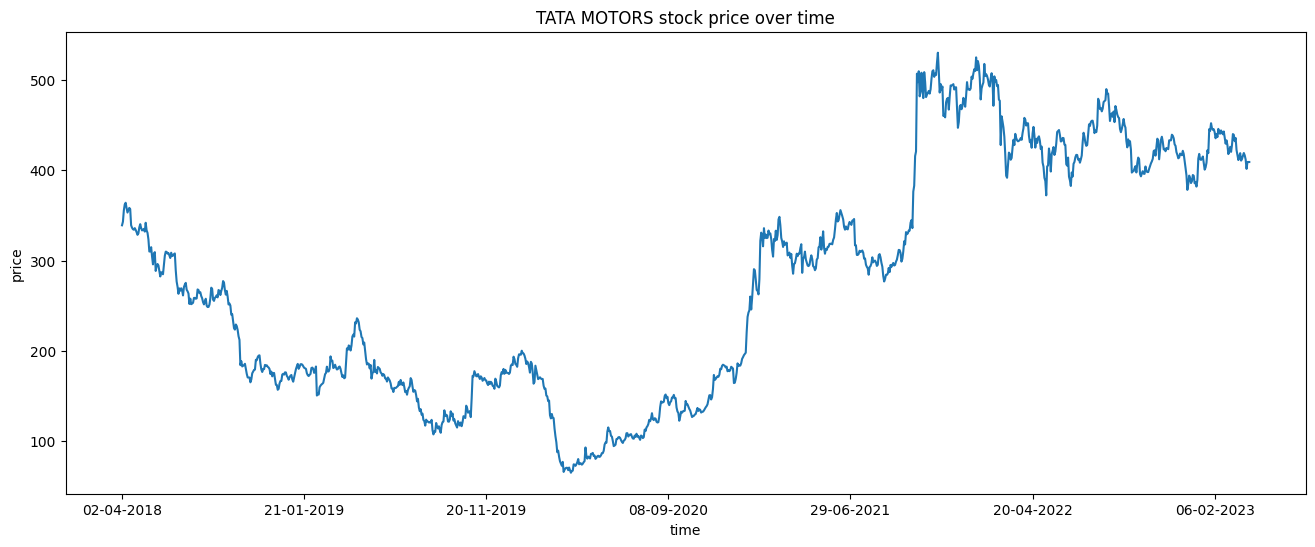

In [21]:
plt.figure(figsize=(16,6))
plt.plot(df["Date"], df["Close"])
plt.xticks(np.arange(0,1259, 200), df['Date'][0:1259:200])
plt.title("TATA MOTORS stock price over time")
plt.xlabel("time")
plt.ylabel("price")
plt.show()

In [8]:
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as smapi
train_data, test_data = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    # model = ARIMA(history, order=(4,1,0))
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)


Testing Mean Squared Error is 124.8596365105803


In [24]:
import math
print('Testing Mean Squared Error is {}'.format(math.sqrt(MSE_error)))

Testing Mean Squared Error is 11.174060878238507


In [26]:
print(model_predictions[-1])

409.8162622231039


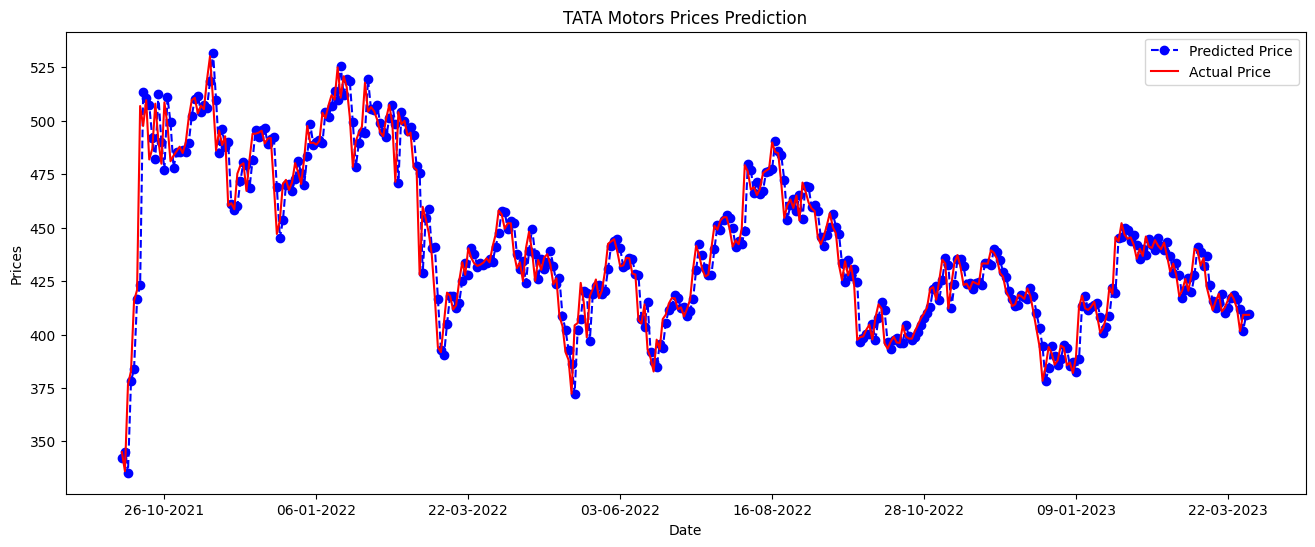

In [19]:
test_set_range = df[int(len(df)*0.7):].index
plt.figure(figsize=(16,6))
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('TATA Motors Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.xticks(np.arange(881,1259,50), df.Date[881:1259:50])
plt.legend()
plt.show()